# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics 

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
df = pd.read_csv('../data/absences.csv')

In [3]:
df

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


<AxesSubplot:xlabel='Age', ylabel='Absences'>

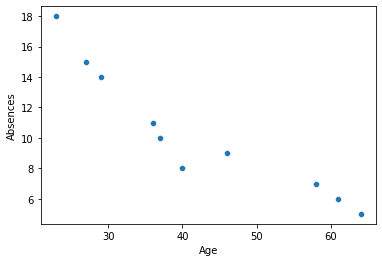

In [4]:
sns.scatterplot(x = 'Age', y = 'Absences', data = df)

In [5]:
# Looking at the scatter plot, we can see that there exists a negative linear relationship between Age and Absences.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [12]:
# slope formula =  Σ [ (xi – mean(x))(yi – mean(y))] / Σ [ (xi – mean(x))2]
#intercept formula = mean(y) - slope * mean(x) 

def regr_funct(x,y):
    age = df['Age']
    absences = df['Absences']

    age_mean = np.mean(age)
    absences_mean = np.mean(absences)

    xi_x = np.array([a - age_mean for a in age])
    yi_y = np.array([ab - absences_mean for ab in absences])

    numerator = np.sum(xi_x*yi_y)

    xi_x2 = [(a - age_mean)**2 for a in age]

    denominator = np.sum(xi_x2)


    slope = numerator/denominator

    intercept = absences_mean - slope*age_mean
    
    return slope, intercept


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [7]:
regr_funct(df['Age'], df['Absences'])

(-0.2681088337033404, 21.58738189891063)

<AxesSubplot:xlabel='Age', ylabel='Absences'>

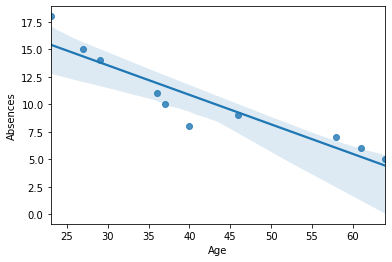

In [8]:
sns.regplot(x = df['Age'], y = df['Absences'])

In [9]:
# We can see that relationship between the two variables it exists indeed. As younger the workers are, the more absences they have.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [23]:
age = df['Age']
absences = df['Absences']

age_mean = np.mean(age)
absences_mean = np.mean(absences)

xi_x = np.array([a - age_mean for a in age])
yi_y = np.array([ab - absences_mean for ab in absences])

In [26]:
def covar_corr(x,y):
    df_covariance = np.sum(xi_x*yi_y)/len(age)
    df_correlation = df_covariance/np.sqrt((statistics.variance(x))*(statistics.variance(y)))
    
    return df_covariance, df_correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [27]:
covar_corr(df['Age'], df['Absences'])

(-51.92999999999999, -0.839289068323291)

In [ ]:
# By the results obtained seems that there exists a strong negative linear correlation between Age and Absenteeism

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
''' 1. The scatter plot showed that the 2 variables had at first look a negative linear correlation. We affirmed this
    when calculating both the regression and the correlation function.
    2. We can then confirm that the age tends to be an indicator of absenteeism.
'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [28]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [34]:
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [31]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='Y'>

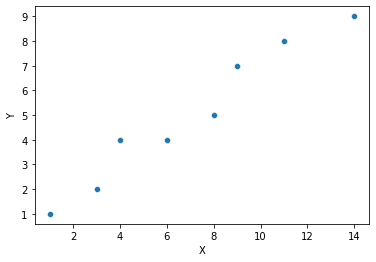

In [37]:
sns.scatterplot(x= 'X', y = 'Y', data = ironbeers_df)

In [ ]:
# Before watching out for the regression, looks like the both variables are highly positive correlated.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [38]:
from sklearn import linear_model

In [45]:
ironbeers_X = ironbeers_df.drop(columns = 'Y')
ironbeers_y = ironbeers_df['Y']

In [52]:
np.array(ironbeers_X).shape

(8, 1)

In [50]:
np.array(ironbeers_y).shape

(8,)

In [47]:
ironbeers_lin_reg = linear_model.LinearRegression()

In [48]:
ironbeers_lin_reg.fit(ironbeers_X, ironbeers_y)

LinearRegression()

In [53]:
# The coefficient
ironbeers_lin_reg.coef_

array([0.63636364])

In [54]:
ironbeers_lin_reg.intercept_

0.545454545454545

<AxesSubplot:xlabel='X', ylabel='Y'>

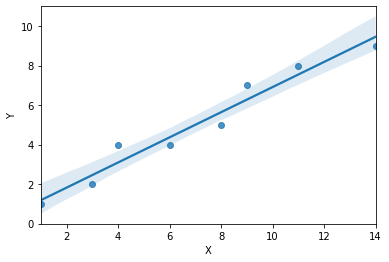

In [57]:
sns.regplot(x= ironbeers_df['X'], y = ironbeers_df['Y'])

In [ ]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
''' For each person you say to stay to Ironbeers actually a 0,63 people (weird to explain like that but...) finally make it.
    If you don't say it to anybody, 0,54 people is coming (is like you don't say to anyone but that half body guy fucked up at war suddenly appears).
    
    About if I am the reason I don't know, haters gonna hate I guess.

'''

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here